In [1]:
import torch

/Users/xbno/art/gen1/.venv/lib/python3.12/site-packages/torch/_subclasses/functional_tensor.py:275: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [2]:
import torch
canvas_height = 1000
canvas_width = 1500

#loop to show different values
for i in range(5):
    #create normal distribution to sample from
    start_y_dist = torch.distributions.Normal(canvas_height * 0.8, canvas_height * 0.05)
    #sample from distribution
    start_y = int(start_y_dist.sample())

    #create normal distribution to sample height from
    height_dist = torch.distributions.Normal(canvas_height * 0.2, canvas_height * 0.05)

    height = int(height_dist.sample())
    end_y = start_y + height

    #start_x is fixed because of this being centered
    start_x = canvas_width // 2
    width_dist = torch.distributions.Normal(height * 0.5, height * 0.1)

    width = int(width_dist.sample())
    end_x = start_x + width

    print(f"start_x: {start_x}, end_x: {end_x}, start_y: {start_y}, end_y: {end_y}, width: {width}, height: {height}")

start_x: 750, end_x: 945, start_y: 754, end_y: 1049, width: 195, height: 295
start_x: 750, end_x: 847, start_y: 810, end_y: 1015, width: 97, height: 205
start_x: 750, end_x: 848, start_y: 797, end_y: 989, width: 98, height: 192
start_x: 750, end_x: 816, start_y: 706, end_y: 898, width: 66, height: 192
start_x: 750, end_x: 830, start_y: 892, end_y: 1099, width: 80, height: 207


In [21]:
from PIL import Image, ImageDraw
from IPython.display import display


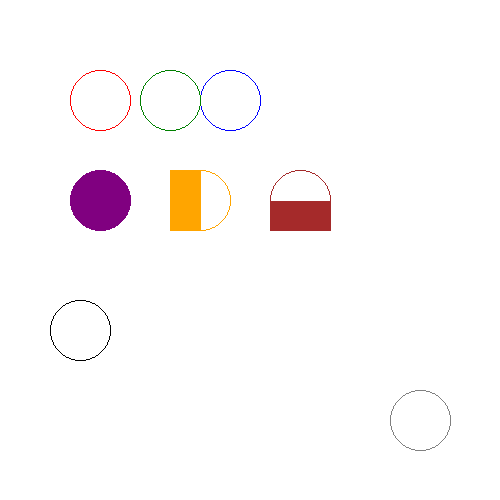

In [20]:
def draw_circle(draw, x=None, y=None, radius=10, color='black', position='center', left=None, right=None, top=None, bottom=None, fill_style='empty', line_width=1):
    """
    Draws a circle on an existing ImageDraw object, positioned by either its center coordinates
    or any edge coordinate (left, right, top, bottom)
    
    Args:
        draw (ImageDraw): ImageDraw object to draw on
        x (int, optional): x-coordinate (used with y and position)
        y (int, optional): y-coordinate (used with x and position)
        radius (int): radius of circle in pixels
        color (str): color of circle outline and fill
        position (str): where the x,y coordinates refer to ('center', 'left', 'right', 'top', 'bottom')
        left (int, optional): left edge x-coordinate
        right (int, optional): right edge x-coordinate
        top (int, optional): top edge y-coordinate
        bottom (int, optional): bottom edge y-coordinate
        fill_style (str): how to fill the circle ('solid', 'vertical_half', 'horizontal_half', 'empty')
        line_width (int): width of the circle outline in pixels
    """
    # Calculate center coordinates based on input position
    if left is not None:
        center_x = left + radius
    elif right is not None:
        center_x = right - radius
    elif x is not None:
        center_x = x if position == 'center' else (
            x + radius if position == 'left' else
            x - radius if position == 'right' else x
        )
    else:
        raise ValueError("Must provide either x, left, or right coordinate")
        
    if top is not None:
        center_y = top + radius
    elif bottom is not None:
        center_y = bottom - radius
    elif y is not None:
        center_y = y if position == 'center' else (
            y + radius if position == 'top' else
            y - radius if position == 'bottom' else y
        )
    else:
        raise ValueError("Must provide either y, top, or bottom coordinate")
    
    # Calculate bounding box coordinates for circle
    left = center_x - radius
    top = center_y - radius
    right = center_x + radius
    bottom = center_y + radius
    
    # Draw based on fill style
    if fill_style == 'solid':
        draw.ellipse([left, top, right, bottom], fill=color, outline=color, width=line_width)
    elif fill_style == 'vertical_half':
        draw.ellipse([left, top, right, bottom], outline=color, width=line_width)
        draw.rectangle([left, top, center_x, bottom], fill=color)
    elif fill_style == 'horizontal_half':
        # Draw full circle outline
        draw.ellipse([left, top, right, bottom], outline=color, width=line_width)
        # Fill bottom half with rectangle
        draw.rectangle([left, center_y, right, bottom], fill=color)
        # Fill bottom half of circle
        draw.ellipse([left, top, right, bottom], fill=color)
        # Cover top half with white rectangle
        draw.rectangle([left, top, right, center_y], fill='white')
        # Redraw outline since it was covered
        draw.ellipse([left, top, right, bottom], outline=color, width=line_width)
    else:  # empty
        draw.ellipse([left, top, right, bottom], outline=color, width=line_width)

# Test the circle drawing function
img = Image.new('RGB', (500, 500), 'white')
draw = ImageDraw.Draw(img)

# Test different positioning methods
draw_circle(draw, x=100, y=100, radius=30, color='red')  # Center positioned
draw_circle(draw, x=200, y=100, radius=30, color='blue', position='left')  # Left edge positioned
draw_circle(draw, x=200, y=100, radius=30, color='green', position='right')  # Right edge positioned

# Test different fill styles
draw_circle(draw, x=100, y=200, radius=30, color='purple', fill_style='solid')  # Solid fill
draw_circle(draw, x=200, y=200, radius=30, color='orange', fill_style='vertical_half')  # Vertical half
draw_circle(draw, x=300, y=200, radius=30, color='brown', fill_style='horizontal_half')  # Horizontal half

# Test edge positioning
draw_circle(draw, left=50, top=300, radius=30, color='black')  # Position by left/top
draw_circle(draw, right=450, bottom=450, radius=30, color='gray')  # Position by right/bottom

display(img)


In [264]:
import numpy as np


In [325]:

def calculate_wave_y(x, amplitude, frequency, start_x, end_x):
    # Primary wave
    y = amplitude * math.sin(2 * math.pi * frequency * (x - start_x) / (end_x - start_x))
    # Add secondary wave with double frequency and half amplitude 
    y += (amplitude * 0.5) * math.sin(2 * 2 * math.pi * frequency * (x - start_x) / (end_x - start_x))
    # Add tertiary wave with triple frequency and third amplitude
    y += (amplitude * 0.33) * math.sin(3 * 2 * math.pi * frequency * (x - start_x) / (end_x - start_x))
    return y


def draw_sinusoidal_pattern_horizontal(draw, main_line_y=250, amplitude=50, frequency=0.75, start_x=50, end_x=1450, width=2):
    # Draw sinusoidal reference line with multiple waves

    # Draw the combined sinusoid point by point
    points = []
    for x in range(start_x, end_x + 1):
        # Calculate y position using multiple sine waves with different frequencies and amplitudes
        y = main_line_y
            
        y += calculate_wave_y(x, amplitude, frequency, start_x, end_x)
        points.append((x, y))

    # Draw the combined sinusoid only if width > 0
    if width > 0:
        for i in range(len(points) - 1):
            draw_line(draw, points[i][0], points[i][1], points[i+1][0], points[i+1][1], color='black', width=width)

    # Generate log-normal distributed spacings
    spacings = np.random.lognormal(mean=4.5, sigma=1.5, size=1000)  # Generate more than needed
    # Scale spacings to fit desired width
    spacings = np.random.permutation(spacings) * (end_x - start_x) / np.sum(spacings)
    
    # Keep only spacings that fit within width
    cumsum = np.cumsum(spacings)
    valid_spacings = spacings[cumsum <= (end_x - start_x)]
    
    # Initialize variables
    prev_direction = None
    x = start_x
    
    # Draw lines with log-normal distributed spacing
    for i in range(len(valid_spacings)):
        x += valid_spacings[i]
        
        # Get y position on sinusoid at this x
        main_y = main_line_y + calculate_wave_y(x, amplitude, frequency, start_x, end_x)
        
        # Random length between 20-100 pixels
        length = np.random.lognormal(mean=3.5, sigma=0.5) * abs(math.sin(2 * math.pi * frequency * (x - start_x) / (end_x - start_x)))
        
        # Randomly choose up or down
        direction = random.choice([-1, 1])

        # Track previous direction
        if i == 0:
            prev_direction = direction
        
        # 80% chance to add offset from sine wave, with direction influenced by previous
        if random.random() < 0.8:
            # 90% chance to continue in same direction as previous line if not first line
            if i > 0 and random.random() < 0.9:
                direction = prev_direction
                
            # Random offset between 5-50 pixels
            offset = random.randint(5, 50)

            # Apply offset in random direction independent of line direction
            offset_direction = random.choice([-1, 1])
            y1 = main_y + (offset * offset_direction)
        else:
            # Start from sine wave
            y1 = main_y
        prev_direction = direction
            
        y2 = main_y + (length * direction)
        
        # Draw vertical line with rare chance of being thicker
        line_width = 1
        if random.random() < 0.01:  # 1% chance
            line_width = random.randint(3, 5)
            
        draw_line(draw, x, y1, x, y2, color='black', width=line_width)
        
        # 30% chance to add circle at end
        if random.random() < 0.3:
            circle_radius = random.choices([2, 3, 4, 5], weights=[4, 2, 2, 1])[0]
            position = random.choice(['left', 'right', 'center'])
            
            if direction == 1:  # Line goes down
                draw_circle(draw, x=x, y=y2, radius=circle_radius, 
                           color='black', position=position, fill_style='solid')
            else:  # Line goes up
                draw_circle(draw, x=x, y=y2, radius=circle_radius, 
                           color='black', position=position, fill_style='horizontal_half')

def draw_sinusoidal_pattern_vertical(draw, main_line_x=250, amplitude=50, frequency=0.75, start_y=50, end_y=1450, width=2):
    # Draw sinusoidal reference line

    # Draw the sinusoid point by point
    points = []
    for y in range(start_y, end_y + 1):
        # Calculate x position using sine wave
        x = main_line_x + amplitude * math.sin(2 * math.pi * frequency * (y - start_y) / (end_y - start_y))
        points.append((x, y))

    # Draw the sinusoid
    for i in range(len(points) - 1):
        draw_line(draw, points[i][0], points[i][1], points[i+1][0], points[i+1][1], color='black', width=width)

    # Draw 300 horizontal lines sequentially from top to bottom
    line_spacing = (end_y - start_y) / 299  # Divide available space by (n-1) lines
    prev_direction = None
    
    for i in range(300):
        # Calculate y position sequentially
        y = start_y + (i * line_spacing)
        
        # Get x position on sinusoid at this y
        main_x = main_line_x + amplitude * math.sin(2 * math.pi * frequency * (y - start_y) / (end_y - start_y))
        
        # Random length between 20-100 pixels
        length = random.randint(20, 500) * abs(math.sin(2 * math.pi * frequency * (y - start_y) / (end_y - start_y)))
        
        # Randomly choose left or right
        direction = random.choice([-1, 1])

        # Track previous direction
        if i == 0:
            prev_direction = direction
        
        # 80% chance to add offset from sine wave, with direction influenced by previous
        if random.random() < 0.8:
            # 90% chance to continue in same direction as previous line if not first line
            if i > 0 and random.random() < 0.9:
                direction = prev_direction
                
            # Random offset between 5-50 pixels
            offset = random.randint(5, 50)
            # Apply offset in random direction independent of line direction
            offset_direction = random.choice([-1, 1])
            x1 = main_x + (offset * offset_direction)
        else:
            # Start from sine wave
            x1 = main_x
        prev_direction = direction
            
        x2 = main_x + (length * direction)
        
        # Draw horizontal line with rare chance of being thicker
        line_width = 1
        if random.random() < 0.01:  # 1% chance
            line_width = random.randint(3, 5)
        # Double the length
        x2 = main_x + (length * direction * 2)
            
        draw_line(draw, x1, y, x2, y, color='black', width=line_width)
        
        # 30% chance to add circle at end
        if random.random() < 0.3:
            circle_radius = random.choices([2, 3, 4, 5], weights=[4, 2, 2, 1])[0]
            position = random.choice(['top', 'bottom', 'center'])
            
            if direction == 1:  # Line goes right
                draw_circle(draw, x=x2, y=y, radius=circle_radius, 
                           color='black', position=position, fill_style='solid')
            else:  # Line goes left
                draw_circle(draw, x=x2, y=y, radius=circle_radius, 
                           color='black', position=position, fill_style='vertical_half')



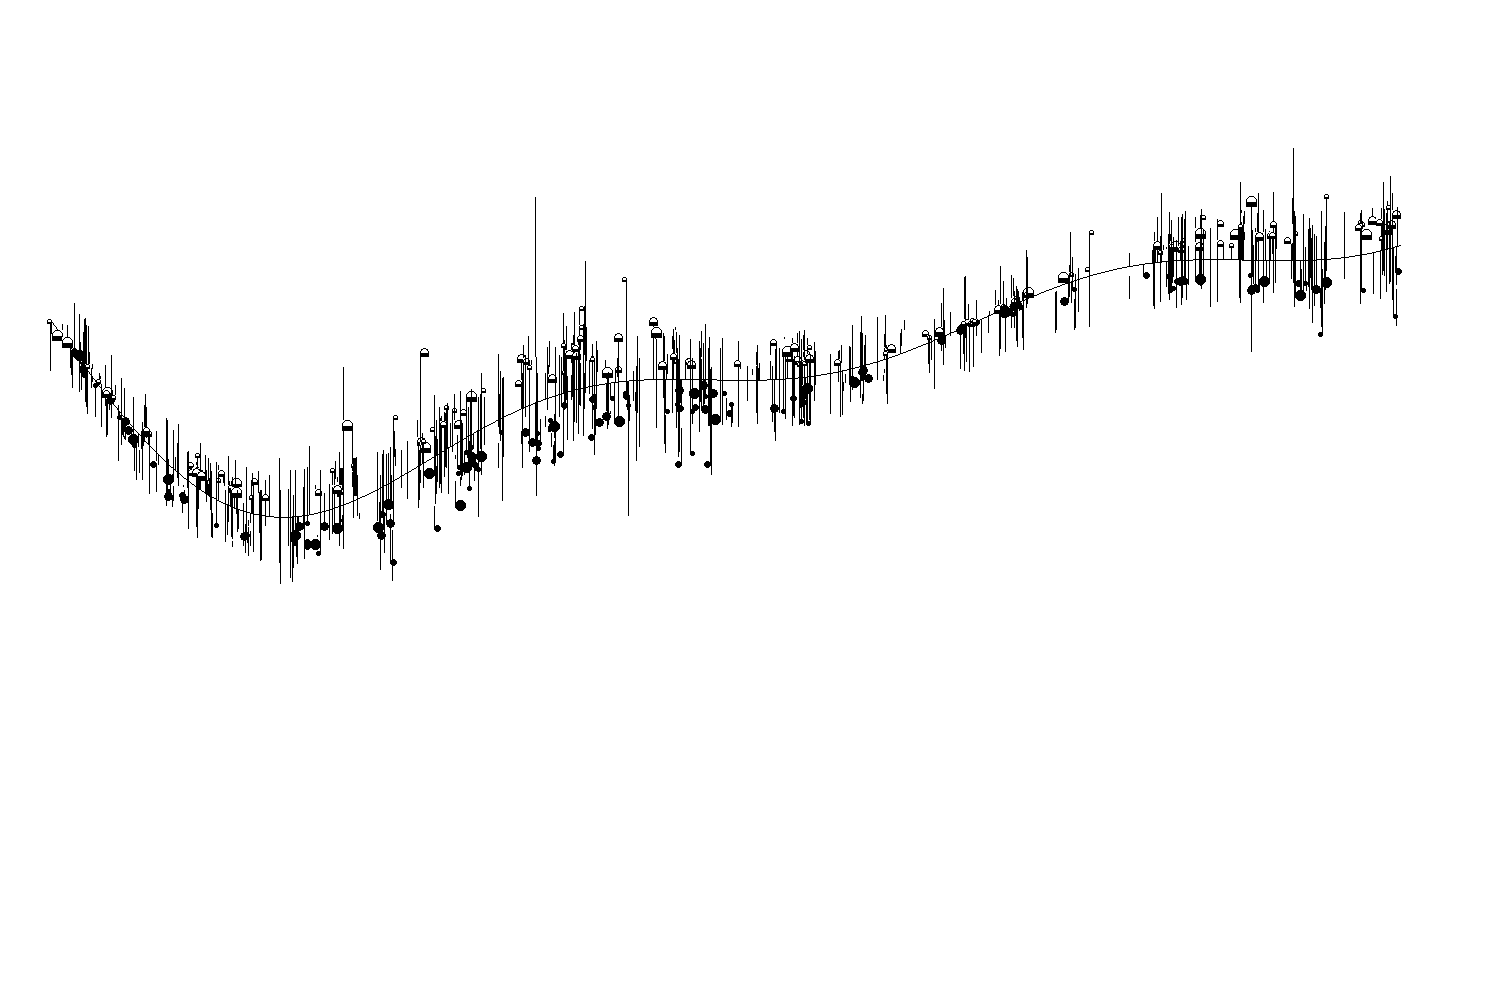

In [326]:

# Create test image
img = Image.new('RGB', (1500, 1000), 'white')
draw = ImageDraw.Draw(img)

# Draw patterns at different heights with varying weights
# First line - make it the longest by using full width (thickest at top)
start_x1 = 50
end_x1 = 1400
draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(200, 400), frequency=random.uniform(0.5, 3.0), amplitude=random.randint(20, 160), start_x=start_x1, end_x=end_x1, width=1)  # Thickest line

# # Second line - start within first 1/3 of previous line
# max_start_x2 = start_x1 + (end_x1 - start_x1) // 3
# start_x2 = random.randint(start_x1, max_start_x2)
# end_x2 = random.randint(start_x2 + 400, end_x1)  # Ensure some minimum length
# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(500, 700), frequency=random.uniform(0.25, 2.0), amplitude=random.randint(20, 80), start_x=start_x2, end_x=end_x2, width=5)  # Thick

# # Third line - can start anywhere
# start_x3 = random.randint(50, 1000)
# end_x3 = random.randint(start_x3 + 400, 1400)  # Ensure some minimum length
# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(400, 600), frequency=random.uniform(0.5, 3.0), amplitude=random.randint(20, 80), start_x=start_x3, end_x=end_x3, width=3)  # Medium

# # Fourth line
# start_x4 = random.randint(50, 1000)
# end_x4 = random.randint(start_x4 + 400, 1400)
# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(500, 700), frequency=random.uniform(0.5, 3.0), amplitude=random.randint(20, 80), start_x=start_x4, end_x=end_x4, width=2)  # Thin

# # Fifth line (bottom)
# start_x5 = random.randint(50, 1000)
# end_x5 = random.randint(start_x5 + 400, 1400)
# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(600, 800), frequency=random.uniform(0.5, 3.0), amplitude=random.randint(20, 80), start_x=start_x5, end_x=end_x5, width=1)  # Thinnest

# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(500, 800), frequency=random.uniform(0.25, 1.5), amplitude=random.randint(40, 120))  # Middle area
# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(500, 800), frequency=random.uniform(0.25, 1.5), amplitude=random.randint(40, 120))  # Middle area
# draw_sinusoidal_pattern_horizontal(draw, main_line_y=random.randint(500, 800), frequency=random.uniform(0.25, 1.5), amplitude=random.randint(40, 120))  # Middle area

# Sample x positions from bimodal distribution
# left_mode = random.gauss(300, 50)  # Mean=300, SD=50 for left mode
# right_mode = random.gauss(1000, 200)  # Mean=1000, SD=50 for right mode

# Right side patterns
# draw_sinusoidal_pattern_vertical(draw, main_line_x=right_mode + random.gauss(0, 100), frequency=random.uniform(0.1, 1.0), amplitude=random.randint(60, 140))
# draw_sinusoidal_pattern_vertical(draw, main_line_x=right_mode + random.gauss(0, 100), frequency=random.uniform(0.1, 1.0), amplitude=random.randint(60, 140))
# draw_sinusoidal_pattern_vertical(draw, main_line_x=right_mode + random.gauss(0, 100), frequency=random.uniform(0.1, 1.0), amplitude=random.randint(60, 140))

# # Left side patterns 
# draw_sinusoidal_pattern_vertical(draw, main_line_x=left_mode + random.gauss(0, 70), frequency=random.uniform(0.05, 1.0), amplitude=random.randint(20, 80))
# draw_sinusoidal_pattern_vertical(draw, main_line_x=left_mode + random.gauss(0, 70), frequency=random.uniform(0.05, 1.0), amplitude=random.randint(20, 80))
# draw_sinusoidal_pattern_vertical(draw, main_line_x=left_mode + random.gauss(0, 70), frequency=random.uniform(0.05, 1.0), amplitude=random.randint(20, 80))
display(img)


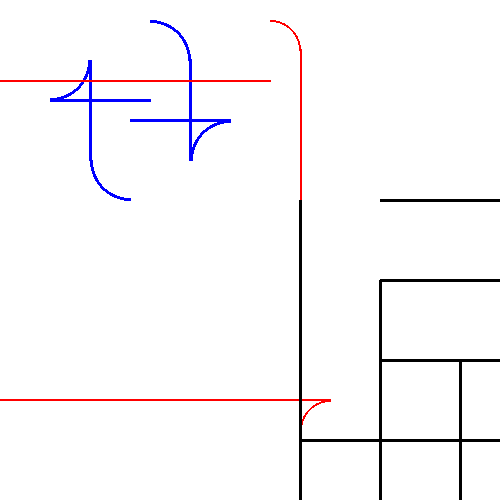

In [306]:
def draw_aurea_grid(draw, start_x=200, start_y=200, cell_size=100, grid_size=5, color='black', line_width=2):
    """
    Draws a grid pattern using the word 'aurea' connected horizontally and vertically
    
    Args:
        draw (ImageDraw): ImageDraw object to draw on
        start_x (int): Starting x coordinate of grid
        start_y (int): Starting y coordinate of grid 
        cell_size (int): Size of each grid cell
        grid_size (int): Number of cells in grid (both width and height)
        color (str): Color of lines
        line_width (int): Width of lines
    """
    word = "aurea"
    word_len = len(word)
    
    # Draw vertical connections
    for row in range(grid_size - word_len + 1):
        for col in range(grid_size):
            # Check if we can place word vertically
            if random.random() < 0.3:  # 30% chance to place word
                for i in range(word_len-1):
                    x = start_x + col * cell_size
                    y1 = start_y + (row + i) * cell_size
                    y2 = start_y + (row + i + 1) * cell_size
                    draw.line([(x, y1), (x, y2)], fill=color, width=line_width)
    
    # Draw horizontal connections
    for row in range(grid_size):
        for col in range(grid_size - word_len + 1):
            # Check if we can place word horizontally
            if random.random() < 0.3:  # 30% chance to place word
                for i in range(word_len-1):
                    x1 = start_x + (col + i) * cell_size
                    x2 = start_x + (col + i + 1) * cell_size
                    y = start_y + row * cell_size
                    draw.line([(x1, y), (x2, y)], fill=color, width=line_width)

# Create grid pattern
draw_aurea_grid(draw, start_x=300, start_y=200, cell_size=80, grid_size=8, line_width=3)
display(img)


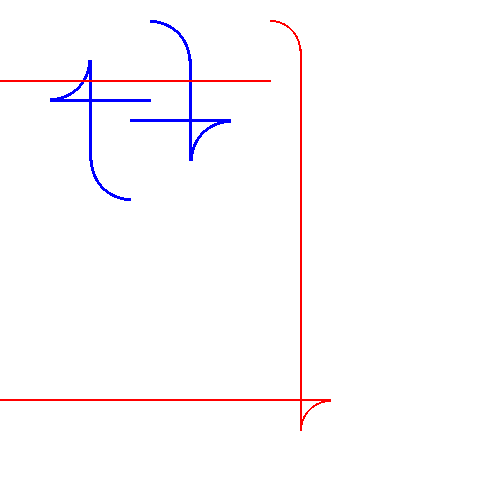

In [305]:
def draw_turning_line(draw, start_x, start_y, segment_length=100, turn_radius=50, num_segments=4, direction='horizontal', color='black', width=2):
    """
    Draws a line that makes consistent radius turns either horizontally or vertically
    
    Args:
        draw (ImageDraw): ImageDraw object to draw on
        start_x (int): Starting x coordinate
        start_y (int): Starting y coordinate
        segment_length (int): Length of straight segments between turns
        turn_radius (int): Radius of turns
        num_segments (int): Number of straight segments to draw
        direction (str): Initial direction - 'horizontal' or 'vertical'
        color (str): Line color
        width (int): Line width
    """
    current_x = start_x
    current_y = start_y
    
    # Track current direction: 0=right, 1=up, 2=left, 3=down
    if direction == 'horizontal':
        heading = 0
    else:
        heading = 3
        
    for i in range(num_segments):
        # Calculate end point of straight segment
        if heading % 2 == 0:  # Moving horizontally
            end_x = current_x + segment_length * (1 if heading == 0 else -1)
            end_y = current_y
        else:  # Moving vertically 
            end_x = current_x
            end_y = current_y + segment_length * (1 if heading == 3 else -1)
            
        # Draw straight segment
        draw.line([(current_x, current_y), (end_x, end_y)], fill=color, width=width)
        
        # Update position
        current_x = end_x
        current_y = end_y
        
        # Draw turn if not the last segment
        if i < num_segments - 1:
            # Calculate center point of turn circle
            if heading == 0:  # Moving right
                circle_x = current_x
                circle_y = current_y - turn_radius
            elif heading == 1:  # Moving up
                circle_x = current_x - turn_radius
                circle_y = current_y
            elif heading == 2:  # Moving left
                circle_x = current_x
                circle_y = current_y + turn_radius
            else:  # Moving down
                circle_x = current_x + turn_radius
                circle_y = current_y
                
            # Draw 90 degree arc
            start_angle = (heading * 90 + 270) % 360
            end_angle = start_angle + 90
            bbox = [
                circle_x - turn_radius, 
                circle_y - turn_radius,
                circle_x + turn_radius, 
                circle_y + turn_radius
            ]
            draw.arc(bbox, start_angle, end_angle, fill=color, width=width)
            
            # Update position after turn
            angle_rad = math.radians(end_angle)
            current_x = circle_x + turn_radius * math.cos(angle_rad)
            current_y = circle_y + turn_radius * math.sin(angle_rad)
            
            # Update heading
            heading = (heading - 1) % 4

# Test the turning line function
img = Image.new('RGB', (500, 500), 'white')
draw = ImageDraw.Draw(img)

# Draw a horizontal turning line
draw_turning_line(draw, 50, 100, segment_length=100, turn_radius=40, num_segments=8, direction='horizontal', color='blue', width=3)

# Draw a vertical turning line
draw_turning_line(draw, 300, 50, segment_length=380, turn_radius=30, num_segments=5, direction='vertical', color='red', width=2)

display(img)


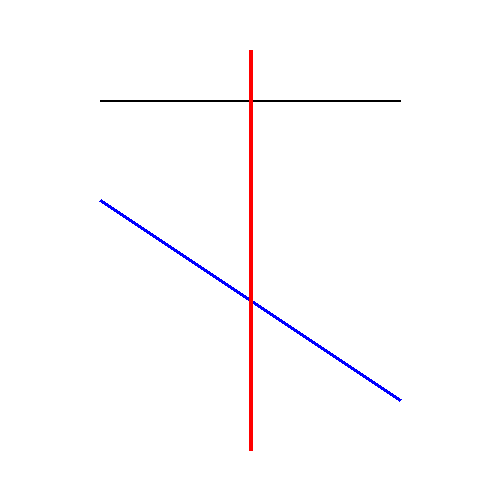

In [241]:
def draw_line(draw, x1, y1, x2, y2, color='black', width=1):
    """
    Draws a line between two points on an existing ImageDraw object
    
    Args:
        draw (ImageDraw): ImageDraw object to draw on
        x1 (int): x-coordinate of start point
        y1 (int): y-coordinate of start point 
        x2 (int): x-coordinate of end point
        y2 (int): y-coordinate of end point
        color (str): color of line (default: 'black')
        width (int): width of line in pixels (default: 1)
    """
    draw.line([(x1,y1), (x2,y2)], fill=color, width=width)

# Test the line drawing function
img = Image.new('RGB', (500, 500), 'white')
draw = ImageDraw.Draw(img)

# Draw some test lines
draw_line(draw, 100, 100, 400, 100, color='black', width=2)  # Horizontal
draw_line(draw, 100, 200, 400, 400, color='blue', width=3)   # Diagonal
draw_line(draw, 250, 50, 250, 450, color='red', width=4)     # Vertical

display(img)


In [ ]:


# Create base image
img = Image.new('RGB', (canvas_width, canvas_height), 'white')
draw = ImageDraw.Draw(img)

# Draw 7 circles alternating sides
circles = []
current_x = 100  # Starting x position
current_y = canvas_height // 2  # Vertical center
radius = 80  # Starting radius

for i in range(7):
    # Alternate between right and left sides
    if i % 2 == 0:
        # Draw from left side
        draw_circle(draw, x=current_x, y=current_y, radius=radius, color='black', position='left')
        current_x = current_x + radius * 2  # Move to right for next circle
    else:
        # Draw from right side
        draw_circle(draw, x=current_x, y=current_y, radius=radius, color='black', position='right')
        current_x = current_x + radius * 2  # Move to right for next circle
    
    # Decrease radius for each subsequent circle
    radius = int(radius * 0.8)

display(img)


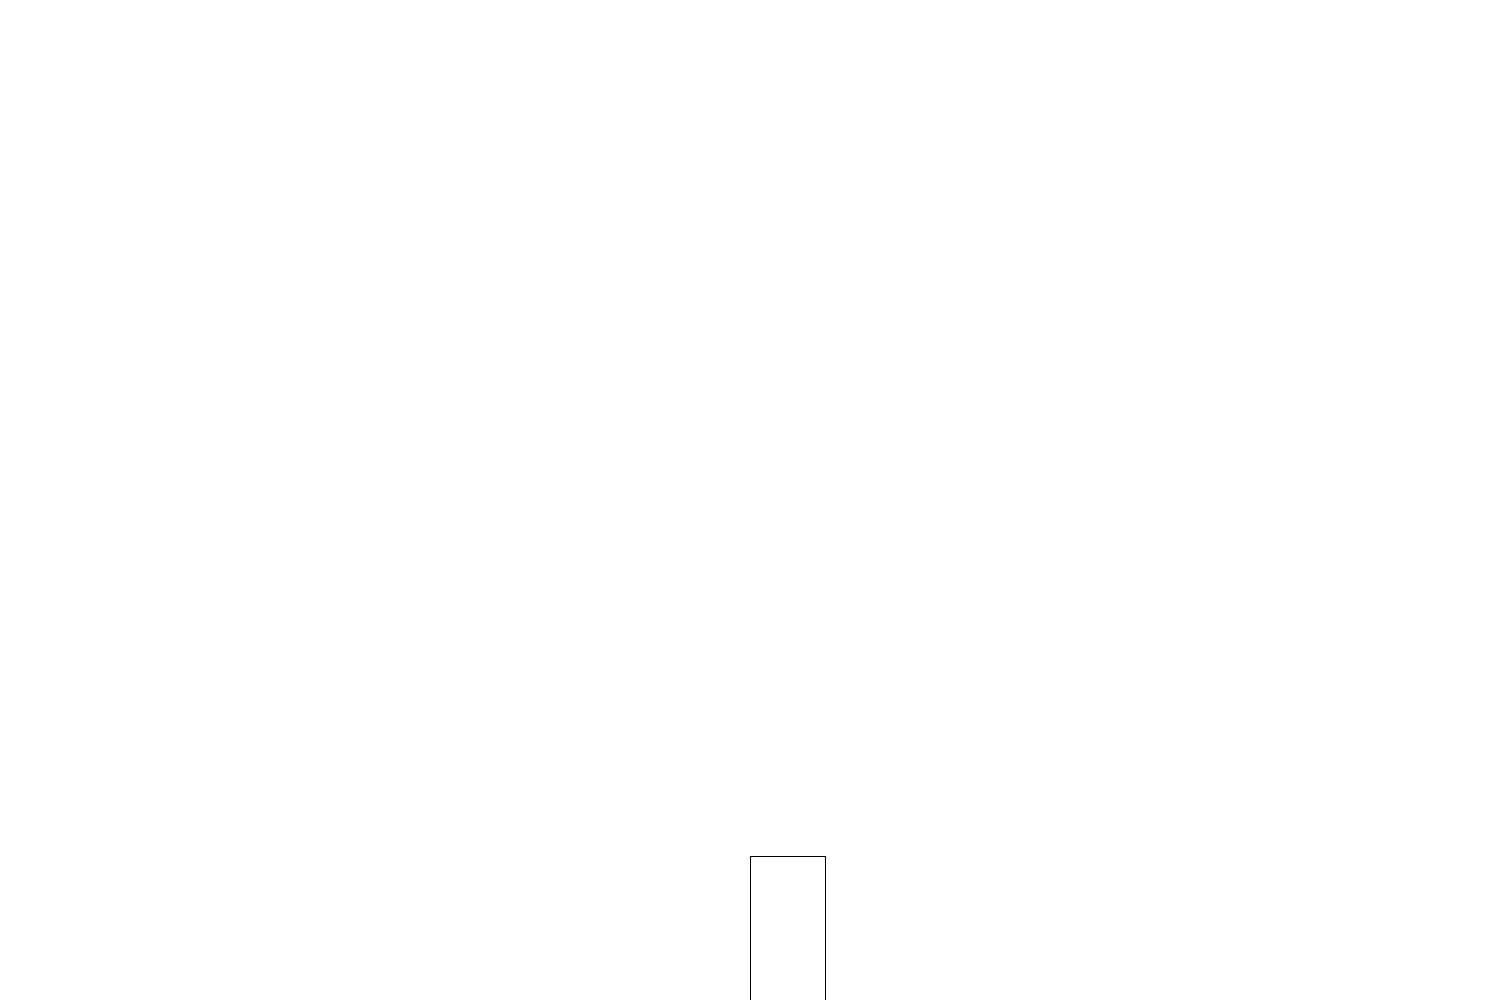

In [5]:
from PIL import Image, ImageDraw
from IPython.display import display

# Create a new image with white background

# Loop to draw rectangles
for i in range(5):
    img = Image.new('RGB', (canvas_width, canvas_height), 'white')

    draw = ImageDraw.Draw(img)

    # Creating normal distributions to sample from
    start_y_dist = torch.distributions.Normal(canvas_height * 0.8, canvas_height * 0.05)
    start_y = int(start_y_dist.sample())

    height_dist = torch.distributions.Normal(canvas_height * 0.2, canvas_height * 0.05)
    height = int(height_dist.sample())
    end_y = start_y + height

    start_x = canvas_width // 2
    width_dist = torch.distributions.Normal(height * 0.5, height * 0.1)
    width = int(width_dist.sample())
    end_x = start_x + width

    # Drawing the rectangle
    draw.rectangle([(start_x, start_y), (end_x, end_y)], outline='black')

    display(img)
    break